1# Gaussian Elimination with Floating Point Arithmetic & LU Decomposition



---
This notebook highlights how to solve a linear system using the method **linalg.solve**() from the numpy package. In addition, the implementation of **Gaussian elimination**, **Backward substitution** and **Forward substitution** is provided and tested. Then, different example related to the application of Gaussian elimination and Backward substitution to a linear system, in Floating Point Arithmetic. In the second part, we will apply the **LU decomposition** to solve a linear system. Lastly, we will compare the computational cost of Gaussian elimination respect to the LU decomposition.

In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
from scipy import linalg

## Solve a linear system using np.linalg.solve

### Create the matrix of coefficients **A** and the vector of coefficients **b** of size 3x3

In [2]:
A = np.random.rand(3,3)
b = np.array([1,2,3])
print('Matrix of coefficients A =\n', A)
print('\nVector of known terms b =', b)

Matrix of coefficients A =
 [[0.39710532 0.22723236 0.32672341]
 [0.57959874 0.28759566 0.27337166]
 [0.89791117 0.11603321 0.25290485]]

Vector of known terms b = [1 2 3]


### Solve the linear system using *np.linalg.solve*()

In [3]:
x = np.linalg.solve(A,b)
print('The linear system solutions are: ', x)
print('The object type of the solutions vector is: ', type(x))

The linear system solutions are:  [ 3.96047375  1.88488377 -3.06385081]
The object type of the solutions vector is:  <class 'numpy.ndarray'>


### Check for the residuals (errors) between the exact solution and the computed one

In [4]:
print('The residual computed by A*x-b =', np.dot(A,x)-b)

The residual computed by A*x-b = [-3.33066907e-16 -8.88178420e-16 -8.88178420e-16]


## Gaussian Elimination, Backward Substitution and Forward Substitution implementation

### Gaussian Elimination
Implementation of Gaussian Elimination to use with square matrix.
* INPUT
  * **A**: Coefficient matrix A
  * **b**: Known terms vector
* OUTPUT
  * **U[:,0:n]**: The Upper Triangular matrix related to the input matrix A,
  * **U[:,n]**: The updated vector of known term

In [5]:
def gaussian_elimination(A, b):
  # Create the augmented matrix [A|b]
  U = np.hstack((A,b))

  # Retrieve the number of rows and columns
  (m,n) = np.shape(U)

  for j in range(0,n):
    for i in range(j+1, m):

      # Compute M = U[i,j] / U[j,j]
      M = U[i,j] / U[j,j]

      # Put zero on all the element below the pivotal element
      U[i,j] = 0

      # Compute the row elimination
      for k in range(j+1, n):
        U[i,k] = U[i,k] - M * U[j,k]

  return U[:,0:n-1], U[:,n-1]

### Forward Substitution
Implementation of Forward Substitution used to solve a Lower Triangular System (implementation by row).
* INPUT
  * **A**: Coefficient matrix
  * **b**: Known terms vector
* OUTPUT
  * **solved**: Boolean values used to indicate if the system could be solved or not
  * **x**: A vector of solutions for the given system (if **solved** is True), or a sentence to indicate that the system could not be solved



In [6]:
def forward_substitution(A,b):
  solved = True

  # Check if the matrix is not singular
  # The product of the main diagonal MUST be =/= 0
  if abs(np.prod(np.diag(A)))< 1.0e-18:
    x = 'Linear system without solution!'
    solved = False
  else:
    # Retrieve the number of rows
    m = b.shape[0]

    # Create a vector to store the solutions
    x = np.zeros((m,1))

    # Compute the first solution of Lower Tr. System
    x[0]=b[0]/A[0,0]

    # Compute each solutions Xi and store it
    # np.dot compute the product row by columns up to the i-th row
    for i in range(1,m):
        x[i]=(b[i] - np.dot(A[i,0:i],x[0:i]))/A[i,i]
  return solved, x

### Backward Substitution
Implementation of Backward Substitution used to solve an Upper Triangular System (implementation by row).
* INPUT
  * **A**: Coefficient matrix
  * **b**: Known terms vector
* OUTPUT
  * **solved**: Boolean values used to indicate if the system could be solved or not
  * **x**: A vector of solutions for the given system (if **solved** is True), or a sentence to indicate that the system could not be solved

In [7]:
def backward_substitution(A,b):
  solved = True

  # Check if the matrix is not singular
  # The product of the main diagonal MUST be =/= 0
  if abs(np.prod(np.diag(A)))< 1.0e-18:
    x = 'Linear system without solution!'
    solved = False
  else:
    # Retrieve the number of rows
    m = b.shape[0]

    # Create a vector to store the solutions
    x = np.zeros((m,1))

    # Compute the first solution of Lower Tr. System
    x[m-1]=b[m-1]/A[m-1,m-1]

    # Compute each solution Xi and store it
    # np.dot compute the product row by columns up to the i-th row
    for i in range(m-2, -1, -1):
        x[i]=(b[i] - np.dot(A[i,i:m],x[i:m]))/A[i,i]
  return solved, x

### Test of Forward substitution
To test our implementation, we will create a Lower triangular system **L** with the exact solutions **xt** (x_true); then we will compute the vector of know terms **b** (b = Lxt). At this point, we will apply the **Forward substitution** on **L** and **b**, to find **x**. Lastly, we compare the xt and x, and we compute the absolute error.

In [8]:
# Define the size of a linear system
n = 6

# Create the Lower triangular matrix of size n
L  = np.tril(np.random.rand(n,n))
print('Matrix of coefficients L =\n', L)

# Fix the exact solutions of the linear system to one
xt = np.ones((n,1))

# Compute the vector of known terms
b  = np.dot(L,xt)
print('\nVector of known terms b =\n', b)

# Computed the solutions using the Forward substitution
(solved, x)  = forward_substitution(L, b)

print('\n----------------------------------------------------------------------------')
if solved:
  print('\nThe exact solutions are xt =\n', xt)
  print('\nThe computed solutions are x =\n', x)
  print('\n----------------------------------------------------------------------------')
  print('The absolute error with respect each solution is = ', np.max(abs(x-xt)))
  print('The determinant is equal to = ', np.prod(np.diag(L)))
  print('The condition number of matrix L is equal to = ', np.linalg.cond(L))
else:
  print(x)

Matrix of coefficients L =
 [[0.57648022 0.         0.         0.         0.         0.        ]
 [0.93209185 0.77969929 0.         0.         0.         0.        ]
 [0.74430673 0.69761765 0.92929961 0.         0.         0.        ]
 [0.97434682 0.23055474 0.70948096 0.99620424 0.         0.        ]
 [0.19010034 0.75899758 0.57286109 0.86187308 0.63004465 0.        ]
 [0.55837452 0.76094355 0.04061583 0.86872522 0.56809171 0.55903538]]

Vector of known terms b =
 [[0.57648022]
 [1.71179114]
 [2.37122398]
 [2.91058676]
 [3.01387674]
 [3.35578621]]

----------------------------------------------------------------------------

The exact solutions are xt =
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

The computed solutions are x =
 [[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]

----------------------------------------------------------------------------
The absolute error with respect each solution is =  4.440892098500626e-16
The determinant is equal to =  0.14656366235369434
The condition number of m

#### Test of conditioning number by adding a regularization term on the main diagonal
We add a weight on the main diagonal. In particular, if we add smaller number and the matrix is ill conditionad maybe nothing changes. If we add weights with higher values then the system will become well conditioned. This is related to the diagonal dominant matrix, which is always well conditioned. Anyway we can use this strategy to add some regularization in order to put a ill-conditioned matrix into a well-conditioned matrix. These weights should be selected in order to doesn't change so much the original matrix.

In [9]:
# Define different regularization terms
regularization_terms = np.array([1e-10, 1e-8, 1e-6, 1e-4, 1e-3, 1e-2, 1e-1, 1])

# Define the size of a linear system
n = 20

for i in range(len(regularization_terms)):
  # Create the Lower triangular matrix of size n
  L  = np.tril(np.random.rand(n,n)) + np.eye(n)*regularization_terms[i]

  # Fix the exact solutions of the linear system to one
  xt = np.ones((n,1))

  # Compute the vector of known terms
  b  = np.dot(L,xt)

  # Computed the solutions using the Forward substitution
  (solved, x)  = forward_substitution(L, b)

  if solved:
    print('Regularization term is = ', regularization_terms[i])
    print('The absolute error with respect each solution is = ', np.max(abs(x-xt)))
    print('The determinant is equal to = ', np.prod(np.diag(L)))
    print('The condition number of matrix L is equal to = ', np.linalg.cond(L))
    print('----------------------------------------------------------------------------')
  else:
    print(x)

Regularization term is =  1e-10
The absolute error with respect each solution is =  9.259260025373806e-14
The determinant is equal to =  2.592583697420832e-06
The condition number of matrix L is equal to =  8206.336940828907
----------------------------------------------------------------------------
Regularization term is =  1e-08
The absolute error with respect each solution is =  4.569217226801925e-10
The determinant is equal to =  2.963016830573211e-11
The condition number of matrix L is equal to =  28328437.149842814
----------------------------------------------------------------------------
Regularization term is =  1e-06
The absolute error with respect each solution is =  2.4569235534954714e-13
The determinant is equal to =  4.2618879521530164e-07
The condition number of matrix L is equal to =  6103.828077320979
----------------------------------------------------------------------------
Regularization term is =  0.0001
The absolute error with respect each solution is =  1.9362

### Test of Gaussian elimination and Backward substitution

In [10]:
# Define the size of linear system
n = 6

# Create a coefficient matrix of size n
A  = np.random.rand(n,n)
print('Matrix of coefficients A =\n', A)

# Fix the exact solutions of the linear system to one
xt = np.ones((n,1))

# Compute the vector of known terms
b  = np.dot(A, xt)
print('\nVector of known terms b =\n', b)

# Compute the Gaussian elimination
(U, b_u) = gaussian_elimination(A, b)
print('\nUpper Triangular matrix of coefficients U =\n', U)
print('\nVector of updated known terms b =\n', b_u)

# Computed the solutions using the Backward substitution
(solved, x)  = backward_substitution(U, b_u)

print('\n----------------------------------------------------------------------------')
if solved:
  print('\nThe exact solutions are xt =\n', xt)
  print('\nThe computed solutions are x =\n', x)
  print('\n----------------------------------------------------------------------------')
  print('\nThe absolute error with respect each solution is = ', np.prod(abs(x-xt)))
  print('The determinant is equal to = ', np.prod(np.diag(U)))
  print('The condition number of matrix U is equal to = ', np.linalg.cond(U))

else:
  print(x)

Matrix of coefficients A =
 [[0.17973089 0.8178109  0.1524073  0.92782487 0.95017144 0.09518123]
 [0.22990266 0.82885475 0.33192297 0.07683002 0.02465035 0.6729022 ]
 [0.68321294 0.81932419 0.501642   0.67874371 0.24075974 0.75463614]
 [0.99724389 0.96704419 0.78409824 0.76216218 0.91665237 0.71395171]
 [0.65087758 0.41233709 0.55353869 0.91990381 0.74922291 0.17138675]
 [0.81757553 0.0617939  0.52073956 0.78145167 0.45885088 0.14432012]]

Vector of known terms b =
 [[3.12312662]
 [2.16506294]
 [3.67831873]
 [5.14115256]
 [3.45726683]
 [2.78473166]]

Upper Triangular matrix of coefficients U =
 [[ 0.17973089  0.8178109   0.1524073   0.92782487  0.95017144  0.09518123]
 [ 0.         -0.21724755  0.13697127 -1.10999657 -1.19076083  0.55115119]
 [ 0.          0.         -1.52115562  8.84931723  9.17750849 -5.41539733]
 [ 0.          0.          0.          0.40319167  1.26212681 -0.63917338]
 [ 0.          0.          0.          0.         -2.30064815  1.0477606 ]
 [ 0.          0.      

## Gaussian elimination and Backward substitution with Well and Ill Conditioned Linear System in Floating Point arithmetic

In [11]:
def test_system_conditioning(A, b):
  (U,b_u) = gaussian_elimination(A,b)
  print('--------------------------------------------------------------------')
  print('\nUpper Triangular matrix of coefficients U =\n', U)
  print('\nVector of updated known terms b =\n', b_u)
  print('--------------------------------------------------------------------')

  (solved, xg) = backward_substitution(U, b_u)
  if solved:
    print('\nSolution after Gaussian Elimination and Backward substitution:\n', xg)
    print('\nSolution using np.linalg.solve(A,b):\n', np.linalg.solve(A, b))
    print('\nThe conditioning number of matrix A: ', np.linalg.cond(A))
  else:
    print(xg)

### Well conditioned problem with stable and unstable algorithms
In this test we will define a linear system, which is a well conditioned system, and we will solve the linear system both with **np.linalg.solve** method (which is a **stable algorithm**) and the implemented **Gaussian elimination algorithm** (which is an **unstable algorithm**). We want to show the difference between stable and unstable algorithms when we try to solve a well conditioned linear system.



In [12]:
par = np.array([1e-8, 1e-17])

#### Test 1
By solving the linear system with stable and unstable algorithms we obtain the same solutions. We can also check that the conditioning number of the matrix A is very low.


In [13]:
A = np.array([[par[0], 1.],[1., 2.]])
b = np.array([[1.],[3.]])
print('Matrix of coefficients A =\n', A)
print('\nVector of known terms b =\n', b)
test_system_conditioning(A, b)

Matrix of coefficients A =
 [[1.e-08 1.e+00]
 [1.e+00 2.e+00]]

Vector of known terms b =
 [[1.]
 [3.]]
--------------------------------------------------------------------

Upper Triangular matrix of coefficients U =
 [[ 1.0000000e-08  1.0000000e+00]
 [ 0.0000000e+00 -9.9999998e+07]]

Vector of updated known terms b =
 [ 1.0000000e+00 -9.9999997e+07]
--------------------------------------------------------------------

Solution after Gaussian Elimination and Backward substitution:
 [[1.00000002]
 [0.99999999]]

Solution using np.linalg.solve(A,b):
 [[1.00000002]
 [0.99999999]]

The conditioning number of matrix A:  5.8284272483858


#### Test 2
By solving the linear system with stable and unstable algorithms, we obtain very different results with a very high error. In fact, we obtain $x_1 = 0$ when we use an unstable algorithm, while we obtain $x_1 = 1$ when we use a stable algorithm. We can also check that the conditioning number remains the same and it is very low which means that the problem is well conditioned and can be solved without any problem. So the problem in this case is related to the algorithm, which is unstable.

In [14]:
A = np.array( [[par[1], 1.],[1., 2.]])
b = np.array([[1.],[3.]])
print('Matrix of coefficients A =\n', A)
print('\nVector of known terms b =\n', b)
test_system_conditioning(A, b)

Matrix of coefficients A =
 [[1.e-17 1.e+00]
 [1.e+00 2.e+00]]

Vector of known terms b =
 [[1.]
 [3.]]
--------------------------------------------------------------------

Upper Triangular matrix of coefficients U =
 [[ 1.e-17  1.e+00]
 [ 0.e+00 -1.e+17]]

Vector of updated known terms b =
 [ 1.e+00 -1.e+17]
--------------------------------------------------------------------

Solution after Gaussian Elimination and Backward substitution:
 [[0.]
 [1.]]

Solution using np.linalg.solve(A,b):
 [[1.]
 [1.]]

The conditioning number of matrix A:  5.828427124746189


### Ill conditioned problem with stable and unstable algorithms
In this test, we will define a linear system, which is a ill-conditioned system, and we will solve the linear system both with **np.linalg.solve** method (which is a **stable algorithm**) and the implemented **Gaussian elimination algorithm** (which is an **unstable algorithm**). We want to show the difference between stable and unstable algorithms when we try to solve a ill-conditioned linear system, in particular that the problem is related to the high-conditioned number. So, is not related to the algorithms and their stability. Moreover, ther is also a scaling problem because we have coefficients with very different magnitude. By scaling the linear system, we could handle the ill conditioned system and this technique could help to solve the system.

#### Test 1

In [15]:
A = np.array( [[10., 1./par[0]],[1., 2.]])
b = np.array([[1.],[3.]])
print('Matrix of coefficients A =\n', A)
print('\nVector of known terms b =\n', b)
test_system_conditioning(A, b)

Matrix of coefficients A =
 [[1.e+01 1.e+08]
 [1.e+00 2.e+00]]

Vector of known terms b =
 [[1.]
 [3.]]
--------------------------------------------------------------------

Upper Triangular matrix of coefficients U =
 [[ 1.000000e+01  1.000000e+08]
 [ 0.000000e+00 -9.999998e+06]]

Vector of updated known terms b =
 [1.  2.9]
--------------------------------------------------------------------

Solution after Gaussian Elimination and Backward substitution:
 [[ 3.00000058e+00]
 [-2.90000058e-07]]

Solution using np.linalg.solve(A,b):
 [[ 3.00000058e+00]
 [-2.90000058e-07]]

The conditioning number of matrix A:  100000020.00000508


#### Test 2
In this case, we try to solve an ill-conditioned linear system both with stable and unstable algorithms. We can check that the conditioning number is very high. Then we compute a row scale operation (we scale the first row) and then computing the conditioning number, we will see that after the scaling it will become very small. So, sometimes also scaling operation can help to solve conditioning issues.

In [16]:
A = np.array( [[10., 1./par[1]],[1., 2.]])
b = np.array([[1.],[3.]])
print('Matrix of coefficients A =\n', A)
print('\nVector of known terms b =\n', b)
test_system_conditioning(A, b)

Matrix of coefficients A =
 [[1.e+01 1.e+17]
 [1.e+00 2.e+00]]

Vector of known terms b =
 [[1.]
 [3.]]
--------------------------------------------------------------------

Upper Triangular matrix of coefficients U =
 [[ 1.e+01  1.e+17]
 [ 0.e+00 -1.e+16]]

Vector of updated known terms b =
 [1.  2.9]
--------------------------------------------------------------------

Solution after Gaussian Elimination and Backward substitution:
 [[ 3.0e+00]
 [-2.9e-16]]

Solution using np.linalg.solve(A,b):
 [[ 3.0e+00]
 [-2.9e-16]]

The conditioning number of matrix A:  9.999999999999998e+16


In [17]:
# We scale the first row of our linear system by 1e-17
A_sc = np.copy(A)
b_sc = np.copy(b)
A_sc[0] = A_sc[0]*1e-17
b_sc[0] = b_sc[0]*1e-17
print('Matrix of coefficients A =\n', A_sc)
print('\nVector of known terms b =\n', b_sc)
test_system_conditioning(A_sc, b_sc)

Matrix of coefficients A =
 [[1.e-16 1.e+00]
 [1.e+00 2.e+00]]

Vector of known terms b =
 [[1.e-17]
 [3.e+00]]
--------------------------------------------------------------------

Upper Triangular matrix of coefficients U =
 [[ 1.e-16  1.e+00]
 [ 0.e+00 -1.e+16]]

Vector of updated known terms b =
 [1.0e-17 2.9e+00]
--------------------------------------------------------------------

Solution after Gaussian Elimination and Backward substitution:
 [[ 3.0e+00]
 [-2.9e-16]]

Solution using np.linalg.solve(A,b):
 [[ 3.0e+00]
 [-2.9e-16]]

The conditioning number of matrix A:  5.828427124746189


## LU decomposition
Firstly, we apply the LU decomposition and the we will see how to solve a linear system.

In [18]:
# define a matrix that we want to factorize using the LU decomposition
A = np.random.rand(5,5)
print("Matrix A: \n{}".format(A))

P, L, U = linalg.lu(A)
print("\nThe permutation matrix P: \n{}".format(P))
print("\nThe lower triangular matrix with unit diagonal elements L: \n{}".format(L))
print("\nThe upper triangular matrix U: \n{}".format(U))

Matrix A: 
[[0.022343   0.98335518 0.93363163 0.61225118 0.00694534]
 [0.83739923 0.02234593 0.2274758  0.30432405 0.95031643]
 [0.12879375 0.5475597  0.31906986 0.54723544 0.84891055]
 [0.99773641 0.21652702 0.67114844 0.71427576 0.0327384 ]
 [0.32496815 0.31833789 0.73726279 0.92679894 0.65634118]]

The permutation matrix P: 
[[0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0.]
 [1. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0.]]

The lower triangular matrix with unit diagonal elements L: 
[[ 1.          0.          0.          0.          0.        ]
 [ 0.0223937   1.          0.          0.          0.        ]
 [ 0.32570542  0.2532573   1.          0.          0.        ]
 [ 0.12908595  0.53102273 -0.8928101   1.          0.        ]
 [ 0.83929906 -0.16288601 -0.65096427  0.24950515  1.        ]]

The upper triangular matrix U: 
[[0.99773641 0.21652702 0.67114844 0.71427576 0.0327384 ]
 [0.         0.97850634 0.91860214 0.5962559  0.00621221]
 [0.         0.         0.28602341 0.54314929 0.64410

In [19]:
# define a linear system that we want to solve using LU decomposition
A = np.random.rand(5,5)
b = np.random.rand(5,1)
print("Matrix A: \n{}".format(A))
print("\nKnow terms b: \n{}".format(b))

LU, piv = linalg.lu_factor(A)
print("\nThe LU decomposed matrix: \n{}".format(LU))
print("\nThe pivot indices representing the permutation matrix P: \n{}".format(piv))

x = linalg.lu_solve((LU, piv), b)
print("\nThe solution x; \n{}".format(x))

Matrix A: 
[[0.13292755 0.6296677  0.60513118 0.27799756 0.80149663]
 [0.26771821 0.89611616 0.64680915 0.13350546 0.78453488]
 [0.50566628 0.13529798 0.93495921 0.44149069 0.42024164]
 [0.90315127 0.11963283 0.89688352 0.41294284 0.62087517]
 [0.67297212 0.37180188 0.22369911 0.3900485  0.19826107]]

Know terms b: 
[[0.69466638]
 [0.6580835 ]
 [0.99181451]
 [0.37083433]
 [0.75797542]]

The LU decomposed matrix: 
[[ 0.90315127  0.11963283  0.89688352  0.41294284  0.62087517]
 [ 0.29642676  0.86065379  0.38094888  0.01109815  0.60049086]
 [ 0.74513776  0.32842351 -0.56971523  0.0787043  -0.46159179]
 [ 0.55989102  0.0793776  -0.70660456  0.26501958 -0.30120918]
 [ 0.14718193  0.71115693 -0.3549347   0.8952629   0.38889825]]

The pivot indices representing the permutation matrix P: 
[3 1 4 4 4]

The solution x; 
[[-0.64154546]
 [ 1.14521819]
 [ 0.80184506]
 [ 2.14771715]
 [-1.27691495]]


## Comparing *Gaussian elimination and back substitution* with *LU decomposition* to solve linear system
The aim of this test is to show the different time required to solve a linear system by using the two methods. In particular, remember that:


*   Gaussian elimination 	$\sim O(n^3)$
*   LU decomposition $\sim O(n^2)$



In [20]:
# Test computational time for Gaussian elimination
dim_matrix = [5, 10, 100, 250, 500, 750, 900, 1000, 1500]
comp_time_gaussian = np.empty([1, len(dim_matrix)])

for i in range(len(dim_matrix)):
  n = dim_matrix[i]
  A = np.random.rand(n,n)
  b = np.random.rand(n,1)

  print("Solving linear system of size {} using Gaussian elimination ...".format(dim_matrix[i]))
  t0 = time.process_time()
  (U, b_u) = gaussian_elimination(A, b)
  backward_substitution(U, b_u)
  comp_time_gaussian[0, i] = time.process_time() - t0
  print("--------------------------------------------------------------------")

Solving linear system of size 5 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 10 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 100 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 250 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 500 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 750 using Gaussian elimination ...


D:\2_UNIVERSITA\2_MAGISTRALE\1_ANNO\2_NUM_METHODS_FOR_CS\Code-Ex\Py-Ex\venv\lib\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


--------------------------------------------------------------------
Solving linear system of size 900 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 1000 using Gaussian elimination ...
--------------------------------------------------------------------
Solving linear system of size 1500 using Gaussian elimination ...
--------------------------------------------------------------------


In [21]:
# Test computational time for LU decomposition
dim_matrix = dim_matrix + [1700, 1800, 2000, 2500, 3000, 5000, 7500, 10000]
comp_time_lu = np.empty([1, len(dim_matrix)])

for i in range(len(dim_matrix)):
  n = dim_matrix[i]
  A = np.random.rand(n,n)
  b = np.random.rand(n,1)

  print("Solving linear system of size {} using LU decomposition ...".format(dim_matrix[i]))
  t0 = time.process_time()
  lu, piv = linalg.lu_factor(A)
  linalg.lu_solve((lu, piv), b)
  comp_time_lu[0, i] = time.process_time() - t0
  print("--------------------------------------------------------------------")

Solving linear system of size 5 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 10 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 100 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 250 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 500 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 750 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 900 using LU decomposition ...
--------------------------------------------------------------------
Solving linear system of size 1000 using LU decomposition ...
-------------------------------

Text(0.5, 1.0, 'Comparing computational time: Gaussian elimination, LU decomposition')

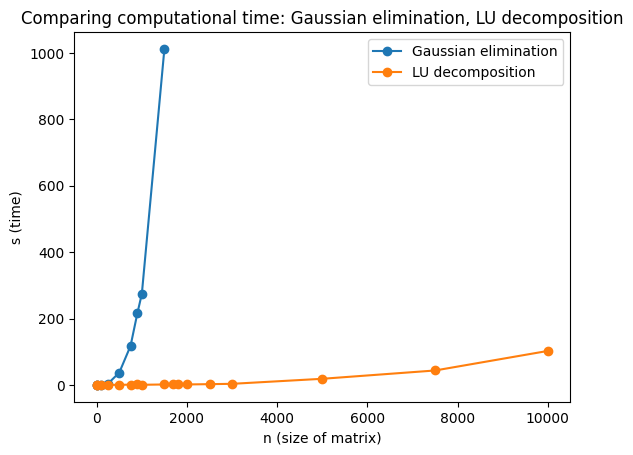

In [22]:
plt.plot(dim_matrix[0:9], comp_time_gaussian[0],'o-')
plt.plot(dim_matrix, comp_time_lu[0], 'o-')
plt.legend(["Gaussian elimination", "LU decomposition"])
plt.xlabel("n (size of matrix)")
plt.ylabel("s (time)")
plt.title("Comparing computational time: Gaussian elimination, LU decomposition")